<a href="https://colab.research.google.com/github/manarhelmy9847/SympAI-chatbot/blob/main/SympAI_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import json
import random
import pickle
from time import sleep
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
df = pd.read_csv('/symptoms based medical test recommendations..csv')
df.head()

,Questions,Recommending medical tests,Disease
0,"I have a fever, cough, body aches, headache, a...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
1,"My symptoms include a sore throat, runny nose,...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
2,"I'm experiencing chest congestion, shortness o...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
3,"I have a high fever, nausea, and vomiting. Whi...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
4,"My symptoms involve a persistent cough, fatigu...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)


In [8]:
df.isnull().sum()

,0
Questions,0
Recommending medical tests,0
Disease,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Questions                   1498 non-null   object
 1   Recommending medical tests  1498 non-null   object
 2   Disease                     1498 non-null   object
dtypes: object(3)
memory usage: 35.2+ KB


In [10]:
df['Disease '].value_counts()

,count
Disease,
Influenza (Flu),50
Tuberculosis (TB),50
HIV/AIDS,50
Malaria,50
COVID-19.,50
Hepatitis,50
Cholera,50
Ebola Virus Disease,50
Dengue Fever,50


In [11]:
diseases = df['Disease '].unique()
diseases

array(['Influenza (Flu)', 'Tuberculosis (TB)', 'HIV/AIDS', 'Malaria',
       'COVID-19.', 'Hepatitis', 'Cholera', 'Ebola Virus Disease',
       'Dengue Fever', 'Coronary Artery Disease (CAD)',
       'Hypertension (High Blood Pressure)',
       'Heart Attack (Myocardial Infarction)', 'Stroke',
       'Arrhythmias (Irregular Heartbeat)', 'Atherosclerosis',
       'Breast Cancer', 'Lung Cancer', 'Prostate Cancer',
       'Colorectal Cancer', 'Skin Cancer (Melanoma)', 'Brain Cancer',
       'Asthma', 'Leukemia', 'Chronic Obstructive ',
       'Pulmonary Disease (COPD)', 'Interstitial Lung Disease',
       'Diabetes', 'Hypothyroidism (Underactive Thyroid)',
       'Hyperthyroidism (Overactive Thyroid)', "Addison's Disease"],
      dtype=object)

---

In [5]:
with open("/content/intents!.json") as file:
    data = json.load(file)

In [6]:
data['intents'][0]

{'tag': 'greeting',
 'patterns': ['Hi',
  'Hey',
  'Is anyone there?',
  'Hi there',
  'Hello',
  'halo',
  'Hey there',
  'Howdy',
  'Hola',
  'Bonjour',
  'Konnichiwa',
  'Guten tag',
  'Ola',
  'Good day',
  "What's up",
  'how are ya',
  'heyy',
  'whatsup',
  '??? ??? ??',
  'Good morning',
  'Good afternoon',
  'Good evening',
  'Good night',
  'morning',
  '?',
  'h',
  'My name is ',
  'I am name.',
  'I go by ',
  'hello i am ',
  'hi i am '],
 'responses': ['Hello there. Tell me how are you feeling today?',
  'Hi there. What brings you here today?',
  'Hi there. How are you feeling today?',
  'Great to see you. How do you feel currently?',
  "Hello there. Glad to see you. What's going on in your world right now?",
  "Good morning. I hope you had a good night's sleep. How are you feeling today? ",
  'Hello, i am Caroline, your smart doctor bot. How can i help you?']}

# Diseases

In [12]:
l = []
for i in range(len(data['intents'])):
    intent = data['intents'][i]
    l.append(intent['tag'])
    print(intent['tag'])

greeting
goodbye
thanks
no-response
about
swear
skill
creation
help
sad
happy
scared
death
understand
Influenza (Flu)
Tuberculosis (TB)
HIV/AIDS
Malaria
COVID-19.
Hepatitis
Cholera
Ebola Virus Disease
Dengue Fever
Coronary Artery Disease (CAD)
Hypertension (High Blood Pressure)
Heart Attack (Myocardial Infarction)
Stroke
Arrhythmias (Irregular Heartbeat)
Atherosclerosis
Breast Cancer
Lung Cancer
Prostate Cancer
Colorectal Cancer
Skin Cancer (Melanoma)
Brain Cancer
Asthma
Leukemia
Chronic Obstructive 
Pulmonary Disease (COPD)
Interstitial Lung Disease
Diabetes
Hypothyroidism (Underactive Thyroid)
Hyperthyroidism (Overactive Thyroid)
Addison's Disease


In [13]:
print("responses = {",end="")
for i in l:
    print(f"\"{i}\":[],")
    if(i==l[-1]):
        print(f"\"{i}\":[]")
print("\}")

responses = {"greeting":[],
"goodbye":[],
"thanks":[],
"no-response":[],
"about":[],
"swear":[],
"skill":[],
"creation":[],
"help":[],
"sad":[],
"happy":[],
"scared":[],
"death":[],
"understand":[],
"Influenza (Flu)":[],
"Tuberculosis (TB)":[],
"HIV/AIDS":[],
"Malaria":[],
"COVID-19.":[],
"Hepatitis":[],
"Cholera":[],
"Ebola Virus Disease":[],
"Dengue Fever":[],
"Coronary Artery Disease (CAD)":[],
"Hypertension (High Blood Pressure)":[],
"Heart Attack (Myocardial Infarction)":[],
"Stroke":[],
"Arrhythmias (Irregular Heartbeat)":[],
"Atherosclerosis":[],
"Breast Cancer":[],
"Lung Cancer":[],
"Prostate Cancer":[],
"Colorectal Cancer":[],
"Skin Cancer (Melanoma)":[],
"Brain Cancer":[],
"Asthma":[],
"Leukemia":[],
"Chronic Obstructive ":[],
"Pulmonary Disease (COPD)":[],
"Interstitial Lung Disease":[],
"Diabetes":[],
"Hypothyroidism (Underactive Thyroid)":[],
"Hyperthyroidism (Overactive Thyroid)":[],
"Addison's Disease":[],
"Addison's Disease":[]
\}


In [14]:
responses ={"greeting":[],
            "goodbye":[],
            "thanks":[],
            "no-response":[],
            "about":[],
            "swear":[],
            "skill":[],
            "creation":[],
            "help":[],
            "sad":[],
            "happy":[],
            "scared":[],
            "death":[],
            "understand":[],
            "Influenza (Flu)":[],
            "Tuberculosis (TB)":[],
            "HIV/AIDS":[],
            "Malaria":[],
            "COVID-19.":[],
            "Hepatitis":[],
            "Cholera":[],
            "Ebola Virus Disease":[],
            "Dengue Fever":[],
            "Coronary Artery Disease (CAD)":[],
            "Hypertension (High Blood Pressure)":[],
            "Heart Attack (Myocardial Infarction)":[],
            "Stroke":[],
            "Arrhythmias (Irregular Heartbeat)":[],
            "Atherosclerosis":[],
            "Breast Cancer":[],
            "Lung Cancer":[],
            "Prostate Cancer":[],
            "Colorectal Cancer":[],
            "Skin Cancer (Melanoma)":[],
            "Brain Cancer":[],
            "Asthma":[],
            "Leukemia":[],
            "Chronic Obstructive ":[],
            "Pulmonary Disease (COPD)":[],
            "Interstitial Lung Disease":[],
            "Diabetes":[],
            "Hypothyroidism (Underactive Thyroid)":[],
            "Hyperthyroidism (Overactive Thyroid)":[],
            "Addison's Disease":[],
            "Addison's Disease":[]
           }

In [15]:
diseases

array(['Influenza (Flu)', 'Tuberculosis (TB)', 'HIV/AIDS', 'Malaria',
       'COVID-19.', 'Hepatitis', 'Cholera', 'Ebola Virus Disease',
       'Dengue Fever', 'Coronary Artery Disease (CAD)',
       'Hypertension (High Blood Pressure)',
       'Heart Attack (Myocardial Infarction)', 'Stroke',
       'Arrhythmias (Irregular Heartbeat)', 'Atherosclerosis',
       'Breast Cancer', 'Lung Cancer', 'Prostate Cancer',
       'Colorectal Cancer', 'Skin Cancer (Melanoma)', 'Brain Cancer',
       'Asthma', 'Leukemia', 'Chronic Obstructive ',
       'Pulmonary Disease (COPD)', 'Interstitial Lung Disease',
       'Diabetes', 'Hypothyroidism (Underactive Thyroid)',
       'Hyperthyroidism (Overactive Thyroid)', "Addison's Disease"],
      dtype=object)

In [16]:
print("info = {",end="")
for i in diseases:
    if(i==diseases[-1]):
        print(f"\"{i}\":\"\"")
    else:
        print(f"\"{i}\":\"\",")
print("}")

info = {"Influenza (Flu)":"",
"Tuberculosis (TB)":"",
"HIV/AIDS":"",
"Malaria":"",
"COVID-19.":"",
"Hepatitis":"",
"Cholera":"",
"Ebola Virus Disease":"",
"Dengue Fever":"",
"Coronary Artery Disease (CAD)":"",
"Hypertension (High Blood Pressure)":"",
"Heart Attack (Myocardial Infarction)":"",
"Stroke":"",
"Arrhythmias (Irregular Heartbeat)":"",
"Atherosclerosis":"",
"Breast Cancer":"",
"Lung Cancer":"",
"Prostate Cancer":"",
"Colorectal Cancer":"",
"Skin Cancer (Melanoma)":"",
"Brain Cancer":"",
"Asthma":"",
"Leukemia":"",
"Chronic Obstructive ":"",
"Pulmonary Disease (COPD)":"",
"Interstitial Lung Disease":"",
"Diabetes":"",
"Hypothyroidism (Underactive Thyroid)":"",
"Hyperthyroidism (Overactive Thyroid)":"",
"Addison's Disease":""
}


## Diseases information

In [17]:
info = {"Influenza (Flu)" : """Overview:
Influenza (Flu) is a contagious respiratory illness caused by influenza viruses that infect the nose, throat, and sometimes the lungs.
It can cause mild to severe illness, and at times can lead to death. The best way to prevent flu is by getting a flu vaccine each year.

Flu Symptoms:
Flu can cause mild to severe illness, and at times can lead to death. Flu symptoms usually come on suddenly.
People who have flu often feel some or all of these signs and symptoms:
fever* or feeling feverish/chills
cough
sore throat
runny or stuffy nose
muscle or body aches
headaches
fatigue (tiredness)
some people may have vomiting and diarrhea, though this is more common in children than adults.
*It’s important to note that not everyone with flu will have a fever.
More information is available at  https://www.cdc.gov/flu/symptoms/flu-vs-covid19.htm

you can see more information here: https://www.mayoclinic.org/diseases-conditions/flu/symptoms-causes/syc-20351719#fromHistory""",
        "Tuberculosis (TB)" : """Overview:
TB is caused by bacteria (Mycobacterium tuberculosis) and it most often affects the lungs. TB is spread through the air when people with lung TB cough, sneeze or spit. A person needs to inhale only a few germs to become infected.
Every year, 10 million people fall ill with tuberculosis (TB). Despite being a preventable and curable disease, 1.5 million people die from TB each year – making it the world’s top infectious killer.
TB is the leading cause of death of people with HIV and also a major contributor to antimicrobial resistance.
Most of the people who fall ill with TB live in low- and middle-income countries, but TB is present all over the world. About half of all people with TB can be found in 8 countries: Bangladesh, China, India, Indonesia, Nigeria, Pakistan, Philippines and South Africa.
About a quarter of the global population is estimated to have been infected with TB bacteria, but most people will not go on to develop TB disease and some will clear the infection. Those who are infected but not (yet) ill with the disease cannot transmit it.
People infected with TB bacteria have a 5–10% lifetime risk of falling ill with TB. Those with compromised immune systems, such as people living with HIV, malnutrition or diabetes, or people who use tobacco, have a higher risk of falling ill.""",
        "HIV/AIDS" : """Overview
Human immunodeficiency virus (HIV) is an infection that attacks the body’s immune system. Acquired immunodeficiency syndrome (AIDS) is the most advanced stage of the disease.

HIV targets the body’s white blood cells, weakening the immune system. This makes it easier to get sick with diseases like tuberculosis, infections and some cancers.

HIV is spread from the body fluids of an infected person, including blood, breast milk, semen and vaginal fluids. It is not spread by kisses, hugs or sharing food. It can also spread from a mother to her baby.

HIV can be treated and prevented with antiretroviral therapy (ART). Untreated HIV can progress to AIDS, often after many years.

WHO now defines Advanced HIV Disease (AHD) as CD4 cell count less than 200cells/mm3 or WHO stage 3 or 4 in adults and adolescents. All children with HIV younger than 5 years of age are considered to have advanced HIV disease.

Signs and symptoms
The symptoms of HIV vary depending on the stage of infection.

The disease spreads more easily in the first few months after a person is infected, but many are unaware of their status until the later stages. In the first few weeks after being infected people may not experience symptoms. Others may have an influenza-like illness including:

fever
headache
rash
sore throat.
The infection progressively weakens the immune system. This can cause other signs and symptoms:

swollen lymph nodes
weight loss
fever
diarrhoea
cough.
Without treatment, people with HIV infection can also develop severe illnesses:

tuberculosis (TB)
cryptococcal meningitis
severe bacterial infections
cancers such as lymphomas and Kaposi's sarcoma.
HIV causes other infections to get worse, such as hepatitis C, hepatitis B and mpox

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/hiv-aids""",
        "Malaria" : """ Overview:
Malaria is an acute febrile illness caused by Plasmodium parasites, which are spread to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.

- What is malaria and how is it transmitted?
Malaria is a life-threatening disease primarily found in tropical countries. It is both preventable and curable. However, without prompt diagnosis and effective treatment, a case of uncomplicated malaria can progress to a severe form of the disease, which is often fatal without treatment.
Malaria is not contagious and cannot spread from one person to another; the disease is transmitted through the bites of female Anopheles mosquitoes.  Five species of parasites can cause malaria in humans and 2 of these species – Plasmodium falciparum and Plasmodium vivax – pose the greatest threat. There are over 400 different species of Anopheles mosquitoes and around 40, known as vector species, can transmit the disease.
This risk of infection is higher in some areas than others depending on multiple factors, including the type of local mosquitoes. It may also vary according to the season, the risk being highest during the rainy season in tropical countries. """,
        "COVID-19." : """Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age.

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Protect yourself and others from infection by staying at least 1 metre apart from others, wearing a properly fitted mask, and washing your hands or using an alcohol-based rub frequently. Get vaccinated when it’s your turn and follow local guidance.

The virus can spread from an infected person’s mouth or nose in small liquid particles when they cough, sneeze, speak, sing or breathe. These particles range from larger respiratory droplets to smaller aerosols. It is important to practice respiratory etiquette, for example by coughing into a flexed elbow, and to stay home and self-isolate until you recover if you feel unwell.""",
        "Hepatitis" : """Hepatitis is an inflammation of the liver that is caused by a variety of infectious viruses  and noninfectious agents leading to a range of health problems, some of which can be fatal. There are five main strains of the hepatitis virus, referred to as types A, B, C, D and E. While they all cause liver disease, they differ in important ways including modes of transmission, severity of the illness, geographical distribution and prevention methods. In particular, types B and C lead to chronic disease in hundreds of millions of people and together are the most common cause of liver cirrhosis, liver cancer and viral hepatitis-related deaths. An estimated 354 million people worldwide live with hepatitis B or C, and for most, testing and treatment remain beyond reach.

Some types of hepatitis are preventable through vaccination. A WHO study found that an estimated 4.5 million premature deaths could be prevented in low- and middle-income countries by 2030 through vaccination, diagnostic tests, medicines and education campaigns. WHO’s global hepatitis strategy, endorsed by all WHO Member States, aims to reduce new hepatitis infections by 90% and deaths by 65% between 2016 and 2030.""",
        "Cholera" : """Key facts
Cholera is an acute diarrhoeal disease that can kill within hours if left untreated.
Cholera is a disease of poverty affecting people with inadequate access to safe water and basic sanitation.
Conflict, unplanned urbanization and climate change all increase the risk of cholera.
Researchers have estimated that each year there are 1.3 to 4.0 million cases of cholera, and 21 000 to 143 000 deaths worldwide due to cholera (1).
Most of those infected have no or mild symptoms and can be successfully treated with oral rehydration solution.
Severe cases need rapid treatment with intravenous fluids and antibiotics.
Provision of safe water and basic sanitation, and hygiene practices is critical to prevent and control the transmission of cholera and other waterborne diseases.
Oral cholera vaccines should be used in conjunction with improvements in water and sanitation to control cholera outbreaks and for prevention in areas known to be high risk for cholera.
A global strategy on cholera control, Ending cholera: a global roadmap to 2030, with a target to reduce cholera deaths by 90% was launched in 2017.

Overview
Cholera is an acute diarrhoeal infection caused by ingestion of food or water contaminated with the bacterium Vibrio cholerae. Cholera remains a global threat to public health and an indicator of inequity and lack of social development.

Symptoms
Cholera is an extremely virulent disease transmitted through the ingestion of contaminated food or water (2). Cholera can cause severe acute watery diarrhoea and the severe forms of the disease can kill within hours if left untreated.

Most people infected with V. cholerae do not develop any symptoms, although the bacteria are present in their faeces for 1–10 days after infection and are shed back into the environment, potentially infecting other people.

Among people who develop symptoms, the majority have mild or moderate symptoms. It takes between 12 hours and 5 days for a person to show symptoms. A minority of patients develop acute watery diarrhoea with severe dehydration. This can lead to death if left untreated.

History
During the 19th century, cholera spread across the world from its original reservoir in the Ganges delta in India. Six subsequent pandemics killed millions of people across all continents. The current (seventh) pandemic started in South Asia in 1961, reached Africa in 1971 and the Americas in 1991. Cholera is now endemic in many countries.""",
        "Ebola Virus Disease" : """Overview
Ebola virus disease (EVD or Ebola) is a rare but severe illness in humans. It is often fatal.

People get infected with Ebola by touching:

infected animals when preparing, cooking or eating them
body fluids of an infected person such as saliva, urine, faeces or semen
things that have the body fluids of an infected person like clothes or sheets.
Ebola enters the body through cuts in the skin or when touching one’s eyes, nose or mouth.

Early symptoms include fever, fatigue and headache.

Some types of Ebola can be prevented with vaccines and treated with medicines.

Ebola first appeared in 1976 in 2 simultaneous outbreaks, one in what is now Nzara, South Sudan, and the other in Yambuku, Democratic Republic of the Congo. The latter occurred in a village near the Ebola River, from which the disease takes its name.

The virus family Filoviridae includes 3 genera: Cuevavirus, Marburgvirus, and Ebolavirus. Within the genus Ebolavirus, 6 species have been identified: Zaire, Bundibugyo, Sudan, Taï Forest, Reston and Bombali.
Symptoms
The symptoms of Ebola infection can be sudden and include fever, fatigue, muscle pain, headache and sore throat. These are followed by vomiting, diarrhoea, rash, and internal and external bleeding.

The time from when someone gets infected to having symptoms is usually from 2 to 21 days. A person with Ebola can only spread the disease once they have symptoms. People can spread Ebola for as long as their body contains the virus, even after they have died.

After recovering from Ebola, some people may have symptoms for two years or longer. These symptoms can include:

feeling tired
headache
muscle and joint pain
eye pain and vision problems
weight gain
belly pain and loss of appetite
hair loss and skin problems
trouble sleeping
memory loss
hearing loss
depression and anxiety.
People should speak to a health-care professional if they have:

symptoms and have been in an area known to have Ebola, or
been in contact with someone who may have had Ebola.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease""",
        "Dengue Fever" : """Overview
Dengue (break-bone fever) is a viral infection that spreads from mosquitoes to people. It is more common in tropical and subtropical climates.

Most people who get dengue won’t have symptoms. But for those that do, the most common symptoms are high fever, headache, body aches, nausea and rash. Most will also get better in 1–2 weeks. Some people develop severe dengue and need care in a hospital.

In severe cases, dengue can be fatal.

You can lower your risk of dengue by avoiding mosquito bites especially during the day.

Dengue is treated with pain medicine as there is no specific treatment currently.

Symptoms
Most people with dengue have mild or no symptoms and will get better in 1–2 weeks. Rarely, dengue can be severe and lead to death.

If symptoms occur, they usually begin 4–10 days after infection and last for 2–7 days. Symptoms may include:

high fever (40°C/104°F)
severe headache
pain behind the eyes
muscle and joint pains
nausea
vomiting
swollen glands
rash.
Individuals who are infected for the second time are at greater risk of severe dengue.

Severe dengue symptoms often come after the fever has gone away:

severe abdominal pain
persistent vomiting
rapid breathing
bleeding gums or nose
fatigue
restlessness
blood in vomit or stool
being very thirsty
pale and cold skin
feeling weak.
People with these severe symptoms should get care right away.

After recovery, people who have had dengue may feel tired for several weeks.
you can see more information here: https://www.who.int/news-room/fact-sheets/detail/dengue-and-severe-dengue""",
        "Coronary Artery Disease (CAD)" : """What is coronary artery disease?
Coronary artery disease (CAD) is the most common type of heart disease in the United States. It is sometimes called coronary heart disease or ischemic heart disease.

For some people, the first sign of CAD is a heart attack. You and your health care team may be able to help reduce your risk for CAD.

What causes coronary artery disease?
CAD is caused by plaque buildup in the walls of the arteries that supply blood to the heart (called coronary arteries) and other parts of the body.

Plaque is made up of deposits of cholesterol and other substances in the artery. Plaque buildup causes the inside of the arteries to narrow over time, which can partially or totally block the blood flow. This process is called atherosclerosis.
you can see more information here: https://www.cdc.gov/heartdisease/coronary_ad.htm""",
        "Hypertension (High Blood Pressure)" : """
        Key facts
An estimated 1.28 billion adults aged 30–79 years worldwide have hypertension, most (two-thirds) living in low- and middle-income countries
An estimated 46% of adults with hypertension are unaware that they have the condition.
Less than half of adults (42%) with hypertension are diagnosed and treated.
Approximately 1 in 5 adults (21%) with hypertension have it under control.
Hypertension is a major cause of premature death worldwide.
One of the global targets for noncommunicable diseases is to reduce the prevalence of hypertension by 33% between 2010 and 2030.
Overview

Hypertension (high blood pressure) is when the pressure in your blood vessels is too high (140/90 mmHg or higher). It is common but can be serious if not treated.

People with high blood pressure may not feel symptoms. The only way to know is to get your blood pressure checked.

Things that increase the risk of having high blood pressure include:

older age
genetics
being overweight or obese
not being physically active
high-salt diet
drinking too much alcohol
Lifestyle changes like eating a healthier diet, quitting tobacco and being more active can help lower blood pressure. Some people may still need to take medicines.

Blood pressure is written as two numbers. The first (systolic) number represents the pressure in blood vessels when the heart contracts or beats. The second (diastolic) number represents the pressure in the vessels when the heart rests between beats.

Hypertension is diagnosed if, when it is measured on two different days, the systolic blood pressure readings on both days is ≥140 mmHg and/or the diastolic blood pressure readings on both days is ≥90 mmHg.
Symptoms
Most people with hypertension don’t feel any symptoms. Very high blood pressures can cause headaches, blurred vision, chest pain and other symptoms.

Checking your blood pressure is the best way to know if you have high blood pressure. If hypertension isn’t treated, it can cause other health conditions like kidney disease, heart disease and stroke.

People with very high blood pressure (usually 180/120 or higher) can experience symptoms including:

severe headaches
chest pain
dizziness
difficulty breathing
nausea
vomiting
blurred vision or other vision changes
anxiety
confusion
buzzing in the ears
nosebleeds
abnormal heart rhythm
If you are experiencing any of these symptoms and a high blood pressure, seek care immediately.

The only way to detect hypertension is to have a health professional measure blood pressure. Having blood pressure measured is quick and painless. Although individuals can measure their own blood pressure using automated devices, an evaluation by a health professional is important for assessment of risk and associated conditions.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/hypertension""",
        "Heart Attack (Myocardial Infarction)" : """Heart attack
A heart attack occurs when an artery that sends blood and oxygen to the heart is blocked. Fatty, cholesterol-containing deposits build up over time, forming plaques in the heart's arteries. If a plaque ruptures, a blood clot can form. The clot can block arteries, causing a heart attack. During a heart attack, a lack of blood flow causes the tissue in the heart muscle to die.

A heart attack is also called a myocardial infarction.

Prompt treatment is needed for a heart attack to prevent death. Call 911 or emergency medical help if you think you might be having a heart attack.

Symptoms
Symptoms of a heart attack vary. Some people have mild symptoms. Others have severe symptoms. Some people have no symptoms.

Common heart attack symptoms include:

Chest pain that may feel like pressure, tightness, pain, squeezing or aching
Pain or discomfort that spreads to the shoulder, arm, back, neck, jaw, teeth or sometimes the upper belly
Cold sweat
Fatigue
Heartburn or indigestion
Lightheadedness or sudden dizziness
Nausea
Shortness of breath
Women may have atypical symptoms such as brief or sharp pain felt in the neck, arm or back. Sometimes, the first symptom sign of a heart attack is sudden cardiac arrest.

Some heart attacks strike suddenly. But many people have warning signs and symptoms hours, days or weeks in advance. Chest pain or pressure (angina) that keeps happening and doesn't go away with rest may be an early warning sign. Angina is caused by a temporary decrease in blood flow to the heart.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106""",
        "Stroke" : """A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts.

In either case, parts of the brain become damaged or die. A stroke can cause lasting brain damage, long-term disability, or even death.

Learn about the health conditions and lifestyle habits that can increase your risk for stroke.

What happens in the brain during a stroke?
The brain controls our movements, stores our memories, and is the source of our thoughts, emotions, and language. The brain also controls many functions of the body, like breathing and digestion.

To work properly, your brain needs oxygen. Your arteries deliver oxygen-rich blood to all parts of your brain. If something happens to block the flow of blood, brain cells start to die within minutes, because they can’t get oxygen. This causes a stroke.

Learn more about the signs and symptoms of stroke.

you can see more information here: https://www.cdc.gov/stroke/about.htm""",
        "Arrhythmias (Irregular Heartbeat)" : """Overview:
        A heart arrhythmia (uh-RITH-me-uh) is an irregular heartbeat. A heart arrhythmia occurs when the electrical signals that tell the heart to beat don't work properly. The heart may beat too fast or too slow. Or the pattern of the heartbeat may be inconsistent.

A heart arrhythmia may feel like a fluttering, pounding or racing heartbeat. Some heart arrhythmias are harmless. Others may cause life-threatening symptoms.

There are times when it is OK to have a fast or slow heartbeat. For example, the heart may beat faster with exercise or slow down during sleep.

Heart arrhythmia treatment may include medicines, devices such as pacemakers, or a procedure or surgery. The goals of treatment are to control or get rid of fast, slow or otherwise irregular heartbeats. A heart-healthy lifestyle can help prevent heart damage that can trigger some heart arrhythmias.
Symptoms
A heart arrhythmia may not cause any symptoms. The irregular heartbeat may be noticed during a health checkup for another reason.

Symptoms of an arrhythmia may include:

A fluttering, pounding or racing feeling in the chest.
A fast heartbeat.
A slow heartbeat.
Chest pain.
Shortness of breath.
Other symptoms may include:

Anxiety.
Feeling very tired.
Lightheadedness or dizziness.
Sweating.
Fainting or almost fainting.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/heart-arrhythmia/symptoms-causes/syc-20350668""",
        "Atherosclerosis" : """Overview
Arteriosclerosis and atherosclerosis are sometimes used to mean the same thing, but there's a difference between the two terms.

Arteriosclerosis occurs when the blood vessels that carry oxygen and nutrients from the heart to the rest of the body (arteries) become thick and stiff — sometimes restricting blood flow to the organs and tissues. Healthy arteries are flexible and elastic. But over time, the walls in the arteries can harden, a condition commonly called hardening of the arteries.

Atherosclerosis is a specific type of arteriosclerosis.

Atherosclerosis is the buildup of fats, cholesterol and other substances in and on the artery walls. This buildup is called plaque. The plaque can cause arteries to narrow, blocking blood flow. The plaque can also burst, leading to a blood clot.

Although atherosclerosis is often considered a heart problem, it can affect arteries anywhere in the body. Atherosclerosis can be treated. Healthy lifestyle habits can help prevent atherosclerosis.

Symptoms
Mild atherosclerosis usually doesn't have any symptoms.

Atherosclerosis symptoms usually don't happen until an artery is so narrowed or clogged that it can't supply enough blood to organs and tissues. Sometimes a blood clot completely blocks blood flow. The clot may break apart and can trigger a heart attack or stroke.

Symptoms of moderate to severe atherosclerosis depend on which arteries are affected. For example:

If you have atherosclerosis in your heart arteries, you may have chest pain or pressure (angina).
If you have atherosclerosis in the arteries leading to your brain, you may have sudden numbness or weakness in your arms or legs, difficulty speaking or slurred speech, temporary loss of vision in one eye, or drooping muscles in your face. These signal a transient ischemic attack (TIA). Untreated, a TIA can lead to a stroke.
If you have atherosclerosis in the arteries in your arms and legs, you may have symptoms of peripheral artery disease, such as leg pain when walking (claudication) or decreased blood pressure in an affected limb.
If you have atherosclerosis in the arteries leading to your kidneys, you may develop high blood pressure or kidney failure.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/arteriosclerosis-atherosclerosis/symptoms-causes/syc-20350569""",
        "Breast Cancer" : """Overview
Breast cancer is a disease in which abnormal breast cells grow out of control and form tumours. If left unchecked, the tumours can spread throughout the body and become fatal.

Breast cancer cells begin inside the milk ducts and/or the milk-producing lobules of the breast. The earliest form (in situ) is not life-threatening and can be detected in early stages. Cancer cells can spread into nearby breast tissue (invasion). This creates tumours that cause lumps or thickening.

Invasive cancers can spread to nearby lymph nodes or other organs (metastasize). Metastasis can be life-threatening and fatal.

Treatment is based on the person, the type of cancer and its spread. Treatment combines surgery, radiation therapy and medications.

Signs and symptoms
Most people will not experience any symptoms when the cancer is still early hence the importance of early detection.

Breast cancer can have combinations of symptoms, especially when it is more advanced. Symptoms of breast cancer can include:

a breast lump or thickening, often without pain
change in size, shape or appearance of the breast
dimpling, redness, pitting or other changes in the skin
change in nipple appearance or the skin surrounding the nipple (areola)
abnormal or bloody fluid from the nipple.
People with an abnormal breast lump should seek medical care, even if the lump does not hurt.

Most breast lumps are not cancer. Breast lumps that are cancerous are more likely to be successfully treated when they are small and have not spread to nearby lymph nodes.

Breast cancers may spread to other areas of the body and trigger other symptoms. Often, the most common first detectable site of spread is to the lymph nodes under the arm although it is possible to have cancer-bearing lymph nodes that cannot be felt.

Over time, cancerous cells may spread to other organs including the lungs, liver, brain and bones. Once they reach these sites, new cancer-related symptoms such as bone pain or headaches may appear.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/breast-cancer""",
        "Lung Cancer" : """Overview
Lung cancer is a type of cancer that starts when abnormal cells grow in an uncontrolled way in the lungs. It is a serious health issue that can cause severe harm and death.

Symptoms of lung cancer include a cough that does not go away, chest pain and shortness of breath.

It is important to seek medical care early to avoid serious health effects. Treatments depend on the person’s medical history and the stage of the disease.

The most common types of lung cancer are non-small cell carcinoma (NSCLC) and small cell carcinoma (SCLC). NSCLC is more common and grows slowly, while SCLC is less common but often grows quickly.

Lung cancer is a significant public health concern, causing a considerable number of deaths globally. GLOBOCAN 2020 estimates of cancer incidence and mortality produced by the International Agency for Research on Cancer (IARC) show as lung cancer remains the leading cause of cancer death, with an estimated 1.8 million deaths (18%) in 2020.

Smoking tobacco (including cigarettes, cigars, and pipes) is the primary risk factor for lung cancer but it can also affect non-smokers. Other risk factors include exposure to secondhand smoke, occupational hazards (such as asbestos, radon and certain chemicals), air pollution, hereditary cancer syndromes, and previous chronic lung diseases.

Symptoms
Lung cancer can cause several symptoms that may indicate a problem in the lungs.

The most common symptoms include:

cough that does not go away
chest pain
shortness of breath
coughing up blood (haemoptysis)
fatigue
weight loss with no known cause
lung infections that keep coming back.
Early symptoms may be mild or dismissed as common respiratory issues, leading to delayed diagnosis.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/lung-cancer""",
        "Prostate Cancer" : """Overview:
        Cancer is the result of abnormal cell growth, which takes over the body’s normal cell function, making it harder for the body to work the way it should. Prostate cancer develops when abnormal cells form and grow in the prostate gland. Not all abnormal growths, also called tumors, are cancerous (malignant). Some tumors are not cancerous (benign).

Benign growths, such as benign prostatic hyperplasia (BPH), are not life threatening. They do not spread to nearby tissue or other parts of the body. These growths can be removed and may grow back slowly (but often do not grow back).
Cancerous growths, such as prostate cancer, can spread (metastasize) to nearby organs and tissues such as the bladder or rectum, or to other parts of the body. If the abnormal growth is removed, it can still grow back. Prostate cancer can be life threatening if it spreads far beyond the prostate (metastatic disease).

Symptoms
In its early stages, prostate cancer often has no symptoms. When symptoms do occur, they can be like those of an enlarged prostate or BPH. Prostate cancer can also cause symptoms unrelated to BPH. If you have urinary problems, talk with your healthcare provider about them.

Symptoms of prostate cancer can be:

Dull pain in the lower pelvic area
Frequent urinating
Trouble urinating, pain, burning, or weak urine flow
Blood in the urine (Hematuria)
Painful ejaculation
Pain in the lower back, hips or upper thighs
Loss of appetite
Loss of weight
Bone pain

you can see more information here: https://www.urologyhealth.org/urology-a-z/p/prostate-cancer""",
        "Colorectal Cancer" : """Overview
Colorectal cancer is a type of cancer that affects the colon (large intestine) or rectum. It is one of the most common types of cancer worldwide. It can cause severe harm and death.

The risk of colorectal cancer increases with age. Most cases affect people over 50 years old.

Common symptoms include diarrhoea, constipation, blood in the stool, abdominal pain, unexplained weight loss, fatigue, and low iron levels.

Many people will not have symptoms in the early stages of the disease.

The risk of colorectal cancer can be reduced by eating a healthy diet, staying physically active, not smoking tobacco and limiting alcohol. Regular screenings are crucial for early detection.

Colon cancer is the second leading cause of cancer-related deaths worldwide. In 2020, more than 1.9 million new cases of colorectal cancer and more than 930 000 deaths due to colorectal cancer were estimated to have occurred worldwide. Large geographical variations in incidence and mortality rates were observed. The incidence rates were highest in Europe and Australia and New Zealand, and the mortality rates were highest in Eastern Europe. By 2040 the burden of colorectal cancer will increase to 3.2 million new cases per year (an increase of 63%) and 1.6 million deaths per year (an increase of 73%).

Incidence rates of colorectal cancer have been decreasing in high-income countries, largely as a result of effective screening programmes. The prognosis for colorectal cancer varies depending on the stage at diagnosis. Early-stage cancers have higher survival rates than advanced-stage cancers. Timely diagnosis, appropriate treatment, and regular follow-up care are important for improving survival rates and quality of life.

Symptoms
Colorectal cancer often has no symptoms in the early stages. Regular screenings are important to catch the disease early and begin treatment.

Common symptoms include:

changes in bowel habits such as diarrhoea, constipation, or narrowing of the stool
blood in the stool (rectal bleeding), either bright red or dark and tar-like
abdominal cramps, pain or bloating that won’t go away
unexplained weight loss that is sudden and losing weight without trying
feeling constantly tired and lacking energy, even with enough rest
iron deficiency anaemia due to chronic bleeding, causing fatigue, weakness and paleness.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/colorectal-cancer""",
        "Skin Cancer (Melanoma)" : """Overview:
        Melanoma is a kind of skin cancer that starts in the melanocytes. Melanocytes are cells that make the pigment that gives skin its color. The pigment is called melanin.

Melanoma typically starts on skin that's often exposed to the sun. This includes the skin on the arms, back, face and legs. Melanoma also can form in the eyes. Rarely, it can happen inside the body, such as in the nose or throat.

The exact cause of all melanomas isn't clear. Most melanomas are caused by exposure to ultraviolet light. Ultraviolet light, also called UV light, comes from sunlight or tanning lamps and beds. Limiting exposure to UV light can help reduce the risk of melanoma.

The risk of melanoma seems to be increasing in people under 40, especially women. Knowing the symptoms of skin cancer can help ensure that cancerous changes are detected and treated before the cancer has spread. Melanoma can be treated successfully if it is found early.

Symptoms
Moles
Moles
Enlarge image
Melanoma
Melanoma
Enlarge image
The first melanoma signs and symptoms often are:

A change in an existing mole.
The development of a new pigmented or unusual-looking growth on the skin.
Melanoma doesn't always begin as a mole. It also can happen on otherwise healthy skin.

Melanomas symptoms can happen anywhere on the body. Melanomas most often develop in areas that have had exposure to the sun. This includes the arms, back, face and legs.

Melanomas also can happen in areas that aren't as exposed to the sun. This includes the soles of the feet, palms of the hands and fingernail beds. Melanoma also can happen inside the body. These hidden melanomas are more common in people with brown or Black skin.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/melanoma/symptoms-causes/syc-20374884""",
        "Brain Cancer" : """Overview:
        Brain cancers include primary brain tumours, which start in the brain and almost never spread to other parts of the body, and secondary tumours (or metastases), which are caused by cancers that began in another part of the body.

There are more than 40 major types of brain tumours, which are grouped into two main types:

benign - slow-growing and unlikely to spread. Common types are meningiomas, neuromas, pituitary tumours and craniopharyngiomas.
malignant - cancerous and able to spread into other parts of the brain or spinal cord. Common types include astrocytomas, oligodendrogliomas, glioblastomas and mixed gliomas.
It is estimated that more than 1,900 people were diagnosed with brain cancer in 2023. The average age at diagnosis is 59 years old.


Brain cancer signs and symptoms
Headaches are often the first symptom of a brain tumour. The headaches can be mild, severe, persistent, or come and go. A headache isn't always a brain tumour but if you're worried, be sure to see your GP.

Other symptoms include:

seizures: severe (e.g. a convulsion) or mild (a fleeting disturbance of awareness, sensation or jerking muscles)

weakness or paralysis in part of the body

loss of balance

general irritability, drowsiness or a change in personality

nausea and vomiting

disturbed vision, hearing, smell or taste.

you can see more information here: https://www.cancer.org.au/cancer-information/types-of-cancer/brain-cancer""",
        "Asthma" : """Overview
Asthma is a chronic lung disease affecting people of all ages. It is caused by inflammation and muscle tightening around the airways, which makes it harder to breathe.

Symptoms can include coughing, wheezing, shortness of breath and chest tightness. These symptoms can be mild or severe and can come and go over time.

Although asthma can be a serious condition, it can be managed with the right treatment. People with symptoms of asthma should speak to a health professional.

Symptoms
Symptoms of asthma can vary from person to person. Symptoms sometimes get significantly worse. This is known as an asthma attack. Symptoms are often worse at night or during exercise.

Common symptoms of asthma include:

a persistent cough, especially at night
wheezing when exhaling and sometimes when inhaling
shortness of breath or difficulty breathing, sometimes even when resting
chest tightness, making it difficult to breathe deeply.
Some people will have worse symptoms when they have a cold or during changes in the weather. Other triggers can include dust, smoke, fumes, grass and tree pollen, animal fur and feathers, strong soaps and perfume.

Symptoms can be caused by other conditions as well. People with symptoms should talk to a healthcare provider.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/asthma""",
        "Leukemia" : """Overview
Leukemia is cancer of the body's blood-forming tissues, including the bone marrow and the lymphatic system.

Many types of leukemia exist. Some forms of leukemia are more common in children. Other forms of leukemia occur mostly in adults.

Leukemia usually involves the white blood cells. Your white blood cells are potent infection fighters — they normally grow and divide in an orderly way, as your body needs them. But in people with leukemia, the bone marrow produces an excessive amount of abnormal white blood cells, which don't function properly.

Treatment for leukemia can be complex — depending on the type of leukemia and other factors. But there are strategies and resources that can help make your treatment successful.

Symptoms
Leukemia symptoms vary, depending on the type of leukemia. Common leukemia signs and symptoms include:

Fever or chills
Persistent fatigue, weakness
Frequent or severe infections
Losing weight without trying
Swollen lymph nodes, enlarged liver or spleen
Easy bleeding or bruising
Recurrent nosebleeds
Tiny red spots in your skin (petechiae)
Excessive sweating, especially at night
Bone pain or tenderness

you can see more information here: https://www.mayoclinic.org/diseases-conditions/leukemia/symptoms-causes/syc-20374373""",
        "Chronic Obstructive " : """Overview
Chronic obstructive pulmonary disease (COPD) is a common lung disease causing restricted airflow and breathing problems. It is sometimes called emphysema or chronic bronchitis.

In people with COPD, the lungs can get damaged or clogged with phlegm. Symptoms include cough, sometimes with phlegm, difficulty breathing, wheezing and tiredness.

Smoking and air pollution are the most common causes of COPD. People with COPD are at higher risk of other health problems.

COPD is not curable but symptoms can improve if one avoids smoking and exposure to air pollution and gets vaccines to prevent infections. It can also be treated with medicines, oxygen and pulmonary rehabilitation.

Symptoms
The most common symptoms of COPD are difficulty breathing, chronic cough (sometimes with phlegm) and feeling tired.

COPD symptoms can get worse quickly. These are called flare-ups. These usually last for a few days and often require additional medicine.

People with COPD also have a higher risk for other health problems. These include:

lung infections, like the flu or pneumonia
lung cancer
heart problems
weak muscles and brittle bones
depression and anxiety.
Common symptoms of COPD develop from mid-life onwards. As COPD progresses, people find it more difficult to carry out their normal daily activities, often due to breathlessness. There may be a considerable financial burden due to limitation of workplace and home productivity, and costs of medical treatment.

COPD is sometimes called emphysema or chronic bronchitis. Emphysema usually refers to destruction of the tiny air sacs at the end of the airways in the lungs. Chronic bronchitis refers to a chronic cough with the production of phlegm resulting from inflammation in the airways. COPD and asthma share common symptoms (cough, wheeze and difficulty breathing) and people may have both conditions.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/chronic-obstructive-pulmonary-disease-(copd)""",
        "Pulmonary Disease (COPD)" : """Overview
Chronic obstructive pulmonary disease (COPD) is a common lung disease causing restricted airflow and breathing problems. It is sometimes called emphysema or chronic bronchitis.

In people with COPD, the lungs can get damaged or clogged with phlegm. Symptoms include cough, sometimes with phlegm, difficulty breathing, wheezing and tiredness.

Smoking and air pollution are the most common causes of COPD. People with COPD are at higher risk of other health problems.

COPD is not curable but symptoms can improve if one avoids smoking and exposure to air pollution and gets vaccines to prevent infections. It can also be treated with medicines, oxygen and pulmonary rehabilitation.

Symptoms
The most common symptoms of COPD are difficulty breathing, chronic cough (sometimes with phlegm) and feeling tired.

COPD symptoms can get worse quickly. These are called flare-ups. These usually last for a few days and often require additional medicine.

People with COPD also have a higher risk for other health problems. These include:

lung infections, like the flu or pneumonia
lung cancer
heart problems
weak muscles and brittle bones
depression and anxiety.
Common symptoms of COPD develop from mid-life onwards. As COPD progresses, people find it more difficult to carry out their normal daily activities, often due to breathlessness. There may be a considerable financial burden due to limitation of workplace and home productivity, and costs of medical treatment.

COPD is sometimes called emphysema or chronic bronchitis. Emphysema usually refers to destruction of the tiny air sacs at the end of the airways in the lungs. Chronic bronchitis refers to a chronic cough with the production of phlegm resulting from inflammation in the airways. COPD and asthma share common symptoms (cough, wheeze and difficulty breathing) and people may have both conditions.

you can see more information here: https://www.who.int/news-room/fact-sheets/detail/chronic-obstructive-pulmonary-disease-(copd)""",
        "Interstitial Lung Disease" : """Overview
Interstitial (in-tur-STISH-ul) lung disease describes a large group of disorders, most of which cause progressive scarring of lung tissue. The scarring associated with interstitial lung disease eventually affects your ability to breathe and get enough oxygen into your bloodstream.

Interstitial lung disease can be caused by long-term exposure to hazardous materials, such as asbestos. Some types of autoimmune diseases, such as rheumatoid arthritis, also can cause interstitial lung disease. In some cases, however, the causes remain unknown.

Once lung scarring occurs, it's generally irreversible. Medications may slow the damage of interstitial lung disease, but many people never regain full use of their lungs. Lung transplant is an option for some people who have interstitial lung disease.

Symptoms
The primary signs and symptoms of interstitial lung disease are:

Shortness of breath at rest or aggravated by exertion
Dry cough

you can see more information here: https://www.mayoclinic.org/diseases-conditions/interstitial-lung-disease/symptoms-causes/syc-20353108""",
        "Diabetes" : """Overview:
Diabetes is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. The most common is type 2 diabetes, usually in adults, which occurs when the body becomes resistant to insulin or doesn't make enough insulin. In the past 3 decades the prevalence of type 2 diabetes has risen dramatically in countries of all income levels. Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin by itself. For people living with diabetes, access to affordable treatment, including insulin, is critical to their survival. There is a globally agreed target to halt the rise in diabetes and obesity by 2025.

About 422 million people worldwide have diabetes, the majority living in low-and middle-income countries, and 1.5 million deaths are directly attributed to diabetes each year. Both the number of cases and the prevalence of diabetes have been steadily increasing over the past few decades.
Symptoms:
Symptoms of type 1 diabetes include the need to urinate often, thirst, constant hunger, weight loss, vision changes and fatigue. These symptoms may occur suddenly. Symptoms for type 2 diabetes are generally similar to those of type 1 diabetes but are often less marked. As a result, the disease may be diagnosed several years after onset, after complications have already arisen. For this reason, it is important to be aware of risk factors.

you can see more information here: https://www.who.int/health-topics/diabetes""",
        "Hypothyroidism (Underactive Thyroid)" : """Overview:
Hypothyroidism is a common condition where the thyroid doesn’t create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures. The main treatment for hypothyroidism is hormone replacement therapy.
Hypothyroidism is when there isn’t enough thyroid hormone in your bloodstream and your metabolism slows down.

Hypothyroidism happens when your thyroid doesn’t create and release enough thyroid hormone into your body. This makes your metabolism slow down, affecting your entire body. Also known as underactive thyroid disease, hypothyroidism is fairly common.

Symptoms:
When your thyroid levels are extremely low, this is called myxedema. A very serious condition, myxedema can cause serious symptoms, including:

A low body temperature.
Anemia.
Heart failure.
Confusion.
Coma.
This severe type of hypothyroidism is life-threatening.

In general, hypothyroidism is a very treatable condition. It can be managed with regular medications and follow-up appointments with your healthcare provider.

you can see more information here: https://my.clevelandclinic.org/health/diseases/12120-hypothyroidism""",
        "Hyperthyroidism (Overactive Thyroid)" : """Overview
Hyperthyroidism happens when the thyroid gland makes too much thyroid hormone. This condition also is called overactive thyroid. Hyperthyroidism speeds up the body's metabolism. That can cause many symptoms, such as weight loss, hand tremors, and rapid or irregular heartbeat.

Several treatments are available for hyperthyroidism. Anti-thyroid medicines and radioiodine can be used to slow the amount of hormones the thyroid gland makes. Sometimes, hyperthyroidism treatment includes surgery to remove all or part of the thyroid gland. In some cases, depending on what's causing it, hyperthyroidism may improve without medication or other treatment.

Symptoms
Hyperthyroidism sometimes looks like other health problems. That can make it hard to diagnose. It can cause many symptoms, including:

Losing weight without trying.
Fast heartbeat, a condition called tachycardia.
Irregular heartbeat, also called arrhythmia.
Pounding of the heart, sometimes called heart palpitations.
Increased hunger.
Nervousness, anxiety and irritability.
Tremor, usually a small trembling in the hands and fingers.
Sweating.
Changes in menstrual cycles.
Increased sensitivity to heat.
Changes in bowel patterns, especially more-frequent bowel movements.
Enlarged thyroid gland, sometimes called a goiter, which may appear as a swelling at the base of the neck.
Tiredness.
Muscle weakness.
Sleep problems.
Warm, moist skin.
Thinning skin.
Fine, brittle hair.
Older adults are more likely to have symptoms that are hard to notice. These symptoms may include an irregular heartbeat, weight loss, depression, and feeling weak or tired during ordinary activities.

you can see more information here: https://www.mayoclinic.org/diseases-conditions/hyperthyroidism/symptoms-causes/syc-20373659""",
        "Addison's Disease" : """Overview
Addison's disease, also called adrenal insufficiency, is an uncommon illness that occurs when the body doesn't make enough of certain hormones. In Addison's disease, the adrenal glands make too little cortisol and, often, too little of another hormone, aldosterone.

Addison's disease can affect anyone and can be life-threatening. Treatment involves taking hormones to replace those that are missing.

Symptoms
Addison's disease symptoms usually happen slowly, often over months. The disease can move so slowly that people who have it may ignore the symptoms at first. Then a stress, such as illness or injury, makes symptoms worse.

Symptoms may include:

Extreme fatigue
Weight loss and loss of appetite
Areas of darkened skin
Low blood pressure, even fainting
Salt craving
Low blood sugar, also called hypoglycemia
Nausea, diarrhea or vomiting
Abdominal pain
Muscle and joint pain
Irritability
Depression
Body hair loss or sexual issues in some people

you can see more information here: https://www.mayoclinic.org/diseases-conditions/addisons-disease/symptoms-causes/syc-20350293""",
       }

In [18]:
len(info)

30

In [19]:
x = []
y = []
labels = []

for i in data['intents']:
    for pattern in i['patterns']:
        x.append(pattern)
        y.append(i['tag'])
    responses[i['tag']] = i['responses']

    if i['tag'] not in labels:
        labels.append(i['tag'])

In [20]:
len(x)

1804

In [21]:
len(labels)

44

In [22]:
labels = sorted(labels)
print(labels)

["Addison's Disease", 'Arrhythmias (Irregular Heartbeat)', 'Asthma', 'Atherosclerosis', 'Brain Cancer', 'Breast Cancer', 'COVID-19.', 'Cholera', 'Chronic Obstructive ', 'Colorectal Cancer', 'Coronary Artery Disease (CAD)', 'Dengue Fever', 'Diabetes', 'Ebola Virus Disease', 'HIV/AIDS', 'Heart Attack (Myocardial Infarction)', 'Hepatitis', 'Hypertension (High Blood Pressure)', 'Hyperthyroidism (Overactive Thyroid)', 'Hypothyroidism (Underactive Thyroid)', 'Influenza (Flu)', 'Interstitial Lung Disease', 'Leukemia', 'Lung Cancer', 'Malaria', 'Prostate Cancer', 'Pulmonary Disease (COPD)', 'Skin Cancer (Melanoma)', 'Stroke', 'Tuberculosis (TB)', 'about', 'creation', 'death', 'goodbye', 'greeting', 'happy', 'help', 'no-response', 'sad', 'scared', 'skill', 'swear', 'thanks', 'understand']


In [23]:
responses[labels[-2]][random.randint(0,len(responses[labels[-1]])-1)]

'Happy to help!'

In [24]:
max_len = max(x, key=len)
print(max_len)

I have Changes in Bowel Habits, Weakness and Fatigue, Iron-Deficiency Anemia, Abdominal Discomfort, Unexplained Weight Loss. What tests do you recommend?,I have Incomplete Evacuation, Changes in Bowel Habits, Blood in Stool, Abdominal Discomfort, Weakness and Fatigue. What tests do you recommend?


In [25]:
len(max_len)

297

## Diseases

In [26]:
x[2]

'Is anyone there?'

# Preprocessing X

In [27]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the punkt_tab data
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [28]:
for i in range(len(x)):
    x[i] = x[i].replace(',','').replace('.','').replace("\'",'').replace("!",'')
    s = ""
    words = nltk.word_tokenize(x[i])
    words = [stemmer.stem(w.lower()) for w in words if w !='?']
    for w in words:
        s = s+w+" "
    x[i] = s
    x[i] = x[i].strip()

In [29]:
x[2]

'is anyon ther'

In [30]:
labels

["Addison's Disease",
 'Arrhythmias (Irregular Heartbeat)',
 'Asthma',
 'Atherosclerosis',
 'Brain Cancer',
 'Breast Cancer',
 'COVID-19.',
 'Cholera',
 'Chronic Obstructive ',
 'Colorectal Cancer',
 'Coronary Artery Disease (CAD)',
 'Dengue Fever',
 'Diabetes',
 'Ebola Virus Disease',
 'HIV/AIDS',
 'Heart Attack (Myocardial Infarction)',
 'Hepatitis',
 'Hypertension (High Blood Pressure)',
 'Hyperthyroidism (Overactive Thyroid)',
 'Hypothyroidism (Underactive Thyroid)',
 'Influenza (Flu)',
 'Interstitial Lung Disease',
 'Leukemia',
 'Lung Cancer',
 'Malaria',
 'Prostate Cancer',
 'Pulmonary Disease (COPD)',
 'Skin Cancer (Melanoma)',
 'Stroke',
 'Tuberculosis (TB)',
 'about',
 'creation',
 'death',
 'goodbye',
 'greeting',
 'happy',
 'help',
 'no-response',
 'sad',
 'scared',
 'skill',
 'swear',
 'thanks',
 'understand']

In [31]:
np.unique(y)

array(["Addison's Disease", 'Arrhythmias (Irregular Heartbeat)', 'Asthma',
       'Atherosclerosis', 'Brain Cancer', 'Breast Cancer', 'COVID-19.',
       'Cholera', 'Chronic Obstructive ', 'Colorectal Cancer',
       'Coronary Artery Disease (CAD)', 'Dengue Fever', 'Diabetes',
       'Ebola Virus Disease', 'HIV/AIDS',
       'Heart Attack (Myocardial Infarction)', 'Hepatitis',
       'Hypertension (High Blood Pressure)',
       'Hyperthyroidism (Overactive Thyroid)',
       'Hypothyroidism (Underactive Thyroid)', 'Influenza (Flu)',
       'Interstitial Lung Disease', 'Leukemia', 'Lung Cancer', 'Malaria',
       'Prostate Cancer', 'Pulmonary Disease (COPD)',
       'Skin Cancer (Melanoma)', 'Stroke', 'Tuberculosis (TB)', 'about',
       'creation', 'death', 'goodbye', 'greeting', 'happy', 'help',
       'no-response', 'sad', 'scared', 'skill', 'swear', 'thanks',
       'understand'], dtype='<U36')

In [32]:
y[0]

'greeting'

In [33]:
labels.index(y[0])

34

In [34]:
labels[34]

'greeting'

# Convert y to categories codes

In [35]:
for i in range(len(y)):
    y[i] = labels.index(y[i])

In [36]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [37]:
t = Tokenizer()
t.fit_on_texts(x)

In [38]:
# saving tokenizer
with open('t.pickle', 'wb') as handle:
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
#%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'/content/t.pickle')

/content/t.pickle

In [40]:
print(len(x))
# For example, to access the last element:
print(x[len(x) - 1])

# Or to access the first element:
print(x[0])

# Or any other element within the range 0 to 404.
print(x[100]) # For example.

1804
is it common for hyperpig and musc pain to be assocy with the symptom iv been expery what test should i request for investig
hi
i lov you


In [41]:
print(x[-1])

is it common for hyperpig and musc pain to be assocy with the symptom iv been expery what test should i request for investig


In [42]:
encoded = t.texts_to_sequences(x)

In [43]:
encoded[-1]

[24,
 33,
 79,
 6,
 408,
 1,
 53,
 18,
 10,
 20,
 84,
 14,
 13,
 8,
 17,
 39,
 25,
 4,
 2,
 9,
 3,
 69,
 6,
 118]

In [44]:
len(max_len)

297

In [45]:
x = pad_sequences(encoded, maxlen=300)
x.shape

(1804, 300)

In [46]:
x[0].shape

(300,)

In [47]:
x = np.array(x)
y = np.array(y)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.9, random_state=13)
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape, sep='\n')

(1623, 300)
(1623,)
(181, 300)
(181,)


In [49]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [50]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34,
       35, 36, 37, 38, 40, 41, 42, 43])

In [51]:
for i in range(len(y_train)):
    if y_train[i] == 35:
        print(i)
        break

105


In [52]:
x_test = np.append(x_test, x_train[116].reshape(1,300),axis=0)
y_test = np.append(y_test, y_train[116])

In [53]:
x_test.shape

(182, 300)

In [54]:
y_test.shape

(182,)

In [55]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [56]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34,
       35, 36, 37, 38, 40, 41, 42, 43])

In [57]:
len(labels)

44

In [58]:
model = Sequential()
model.add(Embedding(1569,64,input_length=300))
model.add(LSTM(16))
model.add(Dense(44,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [60]:
x_train.shape

(1623, 300)

In [61]:
y_train.shape

(1623,)

In [62]:
x_test.shape

(182, 300)

In [63]:
y_test.shape

(182,)

In [64]:
from keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
results = model.fit(x_train,y_train, epochs=200, validation_data=(x_test,y_test),
          callbacks=EarlyStopping(patience=15, monitor="val_accuracy" ,restore_best_weights=True))

Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.0982 - loss: 3.7650 - val_accuracy: 0.2088 - val_loss: 3.6370
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1519 - loss: 3.5520 - val_accuracy: 0.2308 - val_loss: 3.1885
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2324 - loss: 3.0596 - val_accuracy: 0.3187 - val_loss: 2.7696
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3480 - loss: 2.6454 - val_accuracy: 0.4011 - val_loss: 2.4869
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4909 - loss: 2.3211 - val_accuracy: 0.5000 - val_loss: 2.2341
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5916 - loss: 2.0613 - val_accuracy: 0.5659 - val_loss: 2.0443
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6353 - loss: 1.8623 - val_accuracy: 0.5714 - val_loss: 1.8954
Epoch 8/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7083 - loss: 1.6559 - val_accuracy: 0.

In [65]:
model2 = model

In [66]:
loss, acc = model.evaluate(x_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8277 - loss: 0.6757


In [67]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss ,sep='')

Test accuracy = 86.81%
Loss = 0.5819747447967529


In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
results2 = model.fit(x_test,y_test, epochs=3, validation_data=(x_test,y_test))

Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.8699 - loss: 0.5607 - val_accuracy: 0.8571 - val_loss: 0.4837
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8573 - loss: 0.4667 - val_accuracy: 0.8736 - val_loss: 0.4108
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8890 - loss: 0.3900 - val_accuracy: 0.9011 - val_loss: 0.3573


In [69]:
results.history['val_loss']

[3.6369547843933105,
 3.1885037422180176,
 2.7696027755737305,
 2.4868886470794678,
 2.2340734004974365,
 2.0442914962768555,
 1.8953598737716675,
 1.7527300119400024,
 1.6278595924377441,
 1.5353219509124756,
 1.437450885772705,
 1.3611434698104858,
 1.3033089637756348,
 1.2527942657470703,
 1.1735692024230957,
 1.1650925874710083,
 1.0418092012405396,
 1.023259162902832,
 0.9677935838699341,
 0.9413383603096008,
 0.9162436127662659,
 0.905663788318634,
 0.8416389226913452,
 0.8203943371772766,
 0.800876259803772,
 0.7878366112709045,
 0.7848667502403259,
 0.752322793006897,
 0.7413903474807739,
 0.730120062828064,
 0.7097015380859375,
 0.7206530570983887,
 0.6921279430389404,
 0.6789674758911133,
 0.6694946885108948,
 0.676820695400238,
 0.650596559047699,
 0.6511748433113098,
 0.6419958472251892,
 0.6336106657981873,
 0.6147705912590027,
 0.6021138429641724,
 0.5979589819908142,
 0.6038065552711487,
 0.5691809058189392,
 0.6103107333183289,
 0.5819747447967529,
 0.5956038236618042,


In [70]:
results.history['val_accuracy']

[0.20879121124744415,
 0.23076923191547394,
 0.3186813294887543,
 0.40109890699386597,
 0.5,
 0.5659340620040894,
 0.5714285969734192,
 0.6043956279754639,
 0.6428571343421936,
 0.6428571343421936,
 0.6758241653442383,
 0.6868131756782532,
 0.7032967209815979,
 0.6978021860122681,
 0.708791196346283,
 0.7197802066802979,
 0.7472527623176575,
 0.7527472376823425,
 0.7747252583503723,
 0.7802197933197021,
 0.7692307829856873,
 0.7747252583503723,
 0.8131868243217468,
 0.8021978139877319,
 0.8241758346557617,
 0.8241758346557617,
 0.8186812996864319,
 0.8131868243217468,
 0.8241758346557617,
 0.8186812996864319,
 0.8241758346557617,
 0.8296703100204468,
 0.8296703100204468,
 0.8241758346557617,
 0.8461538553237915,
 0.8461538553237915,
 0.8516483306884766,
 0.8516483306884766,
 0.8626373410224915,
 0.8571428656578064,
 0.8626373410224915,
 0.8571428656578064,
 0.8516483306884766,
 0.8571428656578064,
 0.8626373410224915,
 0.8626373410224915,
 0.8681318759918213,
 0.8571428656578064,
 0.85

In [71]:
max(results.history['val_accuracy'])

0.8681318759918213

In [72]:
# Assuming you want the validation accuracy for the last epoch (epoch 2):
results.history['val_accuracy'][-1]

# Or, if you want to iterate through all validation accuracy values:
for i in range(len(results.history['val_accuracy'])):
  print(results.history['val_accuracy'][i])

# If you want the validation accuracy of a specific epoch e.g., epoch 1
epoch_index = 1  # Change this to the desired epoch index (starting from 0)
if epoch_index < len(results.history['val_accuracy']):
    val_accuracy = results.history['val_accuracy'][epoch_index]
    print(f"Validation accuracy for epoch {epoch_index}: {val_accuracy}")
else:
    print(f"Epoch {epoch_index} is out of range. The model was trained for only {len(results.history['val_accuracy'])} epochs.")

0.20879121124744415
0.23076923191547394
0.3186813294887543
0.40109890699386597
0.5
0.5659340620040894
0.5714285969734192
0.6043956279754639
0.6428571343421936
0.6428571343421936
0.6758241653442383
0.6868131756782532
0.7032967209815979
0.6978021860122681
0.708791196346283
0.7197802066802979
0.7472527623176575
0.7527472376823425
0.7747252583503723
0.7802197933197021
0.7692307829856873
0.7747252583503723
0.8131868243217468
0.8021978139877319
0.8241758346557617
0.8241758346557617
0.8186812996864319
0.8131868243217468
0.8241758346557617
0.8186812996864319
0.8241758346557617
0.8296703100204468
0.8296703100204468
0.8241758346557617
0.8461538553237915
0.8461538553237915
0.8516483306884766
0.8516483306884766
0.8626373410224915
0.8571428656578064
0.8626373410224915
0.8571428656578064
0.8516483306884766
0.8571428656578064
0.8626373410224915
0.8626373410224915
0.8681318759918213
0.8571428656578064
0.8516483306884766
0.8571428656578064
0.8571428656578064
0.8571428656578064
0.8626373410224915
0.8516

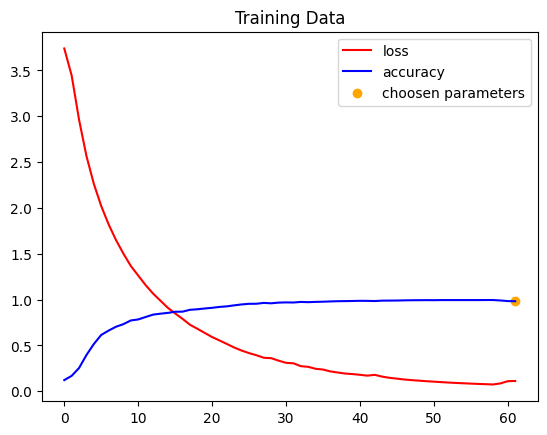

In [73]:
fig = plt.figure()
plt.plot(results.history['loss'], c='red', label='loss')
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.scatter(i ,results.history['accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Training Data")
plt.legend(loc="upper right")
plt.show()

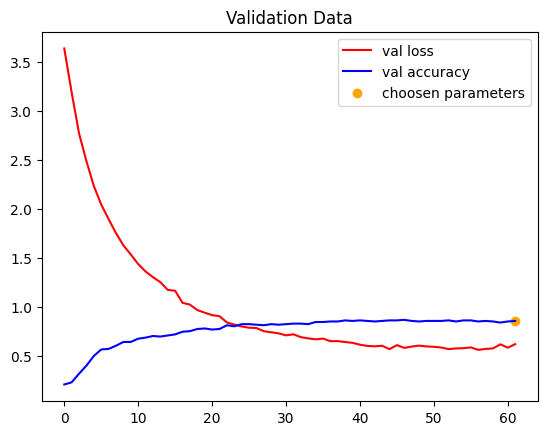

In [74]:
fig = plt.figure()
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.scatter(i ,results.history['val_accuracy'][i], c='orange', label='choosen parameters', marker='o')
plt.title("Validation Data")
plt.legend(loc="upper right")
plt.show()

In [75]:
yp = model.predict(x_test)
yp

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[3.73148336e-03, 1.85368495e-04, 1.13149853e-02, ...,
        1.74306460e-05, 2.92881441e-06, 1.26083808e-06],
       [1.91636907e-04, 1.01623535e-02, 8.59673717e-04, ...,
        8.93923864e-02, 3.94288786e-02, 4.98792976e-02],
       [2.23886482e-02, 1.62683791e-05, 6.34708384e-04, ...,
        4.89454833e-04, 4.71237718e-06, 3.52758507e-05],
       ...,
       [1.20960758e-04, 9.70967889e-01, 1.55636717e-05, ...,
        2.12625964e-05, 1.04414008e-04, 1.34013544e-05],
       [1.30070969e-02, 1.22946706e-02, 5.17219560e-05, ...,
        1.84465622e-04, 4.98419149e-06, 3.21754669e-07],
       [3.56927654e-03, 2.30789169e-06, 1.27249379e-02, ...,
        1.13658396e-04, 4.14565648e-06, 4.76582727e-06]], dtype=float32)

In [76]:
yp = yp.argmax(axis=1)
yp

array([29, 34, 21, 30, 18, 28, 27, 42, 27, 27, 21, 18,  0, 24,  9, 26, 22,
       35,  1, 38, 34, 13, 28,  3, 19, 17, 30, 34, 11, 23, 36, 18, 36, 15,
       22, 22,  4,  7,  3,  7,  0,  6, 10, 18, 22, 42,  3,  7, 23, 34, 14,
        9,  5, 34, 42, 23, 19, 17,  2,  2, 11,  9, 19,  2, 11, 20, 14, 14,
       31,  9, 26, 12,  2,  2,  7,  6, 24, 16, 30, 42, 23, 27, 36, 16, 16,
       29, 21, 29, 17,  5,  1, 10, 18, 36, 21,  4,  0, 25,  5, 26, 42,  9,
       25, 21, 13, 10, 41, 20, 26, 34, 42,  1,  1, 36,  4,  6, 17,  5, 34,
        3, 23, 17, 17,  3,  5, 29,  8, 23,  0, 36, 15, 19, 14, 23, 10, 40,
        5, 27,  0,  6, 43, 23,  3, 14, 14, 20,  1, 40,  3, 10,  0,  5, 11,
        6, 28, 30,  1, 13, 12, 11,  5, 27, 18,  2, 34, 40,  3, 10, 34, 38,
       17, 28,  6,  2, 17, 21,  1,  2, 11,  1, 22, 26])

In [77]:
print(list(y_test))

[np.int64(29), np.int64(37), np.int64(21), np.int64(30), np.int64(18), np.int64(28), np.int64(27), np.int64(31), np.int64(14), np.int64(27), np.int64(21), np.int64(18), np.int64(20), np.int64(24), np.int64(9), np.int64(26), np.int64(22), np.int64(35), np.int64(1), np.int64(38), np.int64(37), np.int64(13), np.int64(28), np.int64(3), np.int64(19), np.int64(17), np.int64(30), np.int64(42), np.int64(11), np.int64(23), np.int64(43), np.int64(18), np.int64(36), np.int64(15), np.int64(22), np.int64(22), np.int64(4), np.int64(7), np.int64(3), np.int64(7), np.int64(0), np.int64(6), np.int64(10), np.int64(18), np.int64(22), np.int64(31), np.int64(3), np.int64(7), np.int64(23), np.int64(34), np.int64(14), np.int64(9), np.int64(5), np.int64(33), np.int64(42), np.int64(23), np.int64(19), np.int64(17), np.int64(20), np.int64(2), np.int64(11), np.int64(9), np.int64(19), np.int64(2), np.int64(11), np.int64(20), np.int64(14), np.int64(14), np.int64(31), np.int64(9), np.int64(26), np.int64(12), np.int64

In [78]:
acc = accuracy_score(y_test, yp)
print("Accuracy Score =",round(acc*100,2),"%")

Accuracy Score = 90.11 %


Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

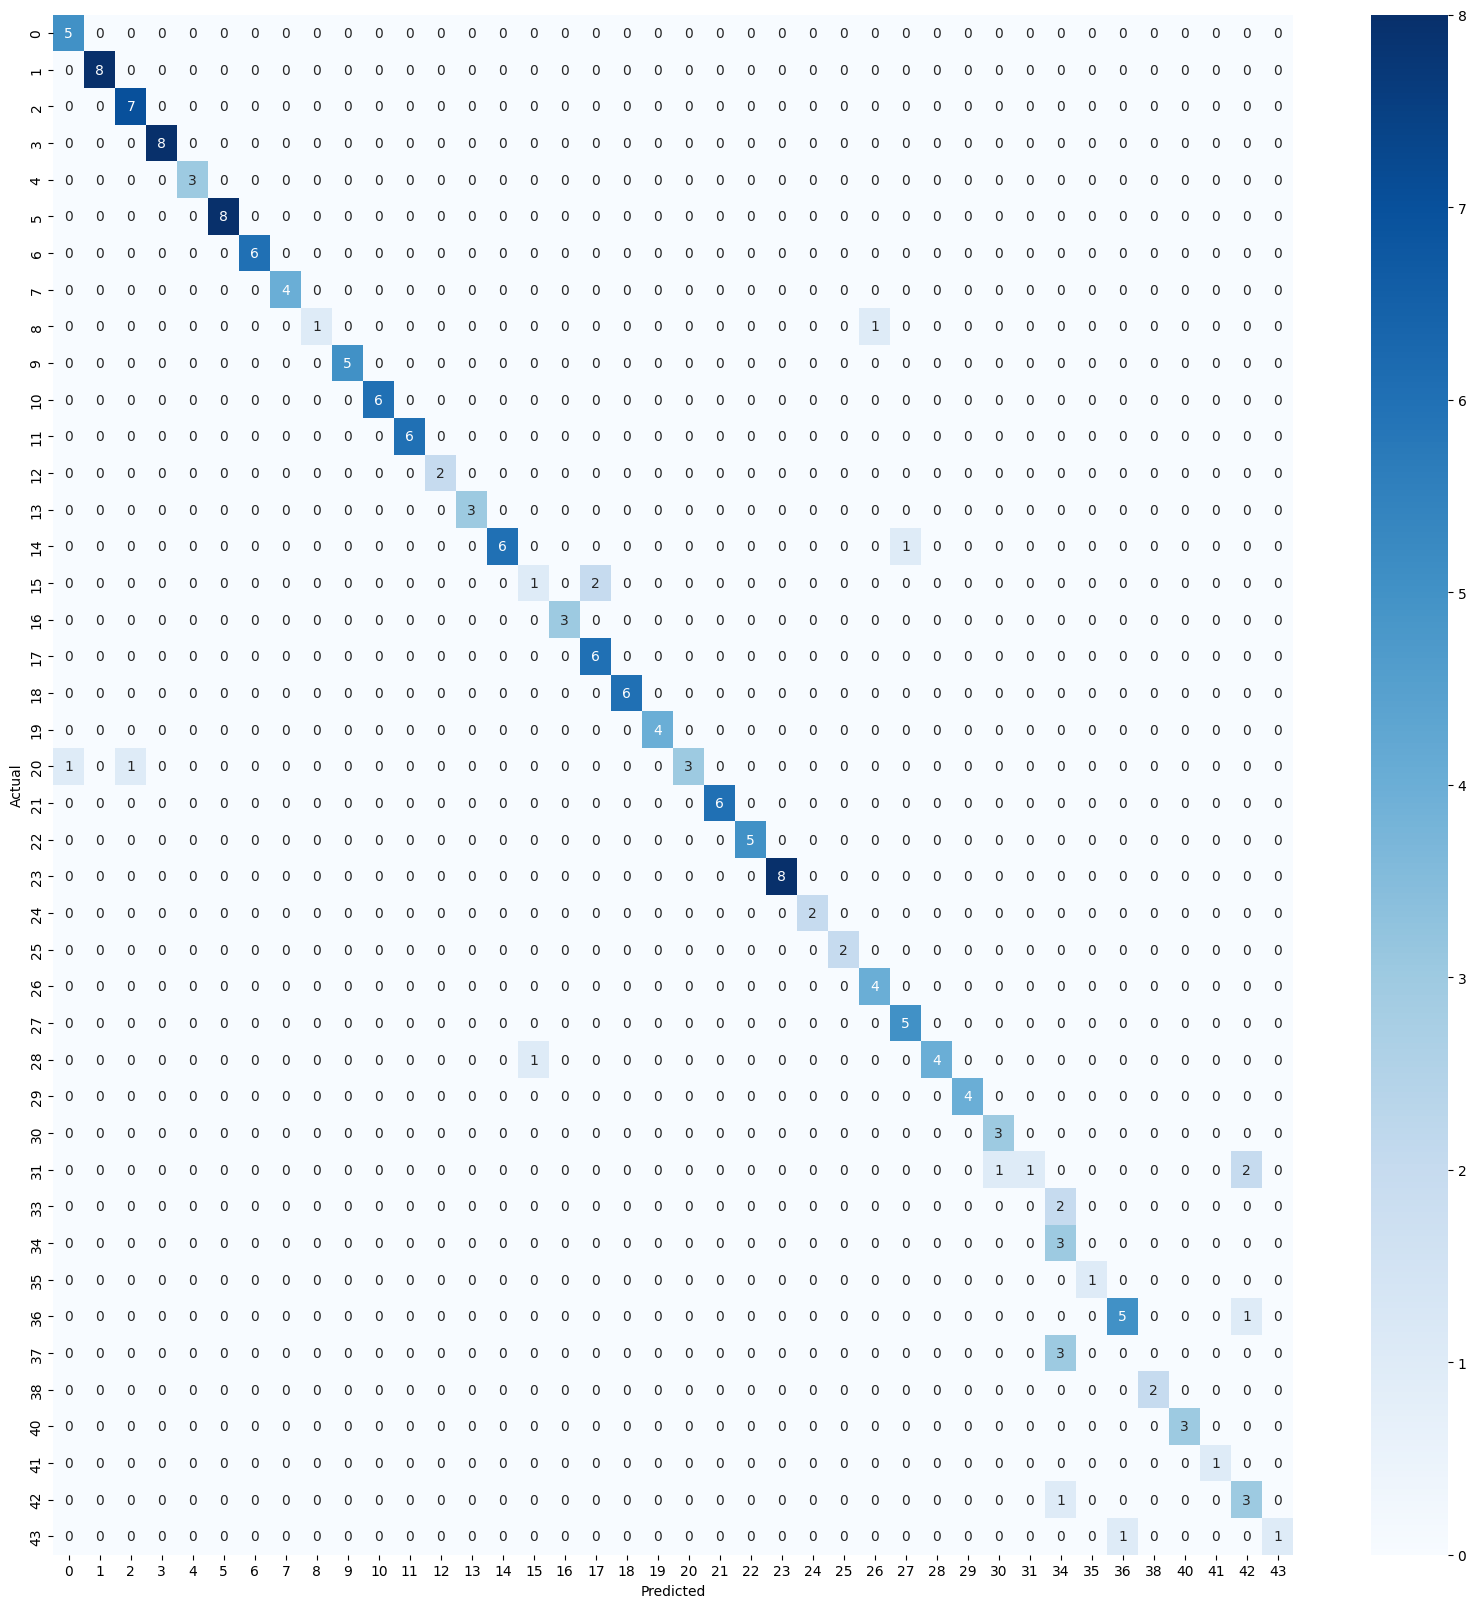

In [79]:
print("Heatmap\n")
fig = plt.figure(figsize=(20,20))
m = pd.crosstab(y_test, yp, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(m, annot=True, cmap='Blues')

# Chatbot

---

In [80]:
df.head()

,Questions,Recommending medical tests,Disease
0,"I have a fever, cough, body aches, headache, a...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
1,"My symptoms include a sore throat, runny nose,...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
2,"I'm experiencing chest congestion, shortness o...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
3,"I have a high fever, nausea, and vomiting. Whi...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)
4,"My symptoms involve a persistent cough, fatigu...","Complete Blood Count (CBC),C-Reactive Protein ...",Influenza (Flu)


In [81]:
df[df['Disease '] == "Influenza (Flu)"].iloc[0,1]

'Complete Blood Count (CBC),C-Reactive Protein (CRP),Procalcitonin,Influenza Antibody Testing'

In [82]:
responses

{'greeting': ['Hello there. Tell me how are you feeling today?',
  'Hi there. What brings you here today?',
  'Hi there. How are you feeling today?',
  'Great to see you. How do you feel currently?',
  "Hello there. Glad to see you. What's going on in your world right now?",
  "Good morning. I hope you had a good night's sleep. How are you feeling today? ",
  'Hello, i am Caroline, your smart doctor bot. How can i help you?'],
 'goodbye': ['See you later.',
  'Have a nice day.',
  'Bye! Come back again.',
  "I'll see you soon.",
  'Sad to see you go :(',
  'Talk to you later',
  'Goodbye!',
  'Come back soon'],
 'thanks': ['Happy to help!',
  'Any time!',
  'My pleasure',
  "You're most welcome!",
  'Glad to help',
  'The pleasure is mine',
  'I am here to help',
  'Thank you for being here',
  'No worries'],
 'no-response': ["Sorry, I didn't understand you!",
  'Not sure I understand that!',
  "Please don't hesitate to talk to me!",
  "Execuseme, I don't get it!"],
 'about': ["I'm Car

# Bot Functions

In [83]:
def process(x='hello'):
    x = x.replace(',','').replace('.','').replace("\'",'').replace("!",'')
    s = ""
    words = nltk.word_tokenize(x)
    words = [stemmer.stem(w.lower()) for w in words if w !='?']
    for w in words:
        s = s+w+" "
    x = s
    x = x.strip()
    x = np.array(x).reshape(1,)
    encoded = t.texts_to_sequences(x)
    x = pad_sequences(encoded, maxlen=300)
    return x[0]

def chat():
    m =""
    while m!="close":
        m = input("You: ")
        x1 = process(m)
        yp1 = model.predict(x1.reshape(1,-1)).argmax(axis=1)[0]
        yp1 = labels[yp1]
        if(yp1 in diseases):
            print(responses[yp1][random.randint(0,len(responses[yp1])-1) ])
            choose = input("Would you like to orientate you to the Laboratories booking page?\n[Y/N]: ")
            choose.lower().strip().replace(',','').replace('.','').replace("\'",'').replace("!",'')
            if(choose in ['yes','yup','sure','yeah','ok','okay','y','please', 'yes please']):
                print('orientate')
            else:
                choose = input("Would you like to get information about these disease?\n[Y/N]: ")
                choose.lower().strip().replace(',','').replace('.','').replace("\'",'').replace("!",'')
                if(choose in ['yes','yup','sure','yeah','ok','okay','y','please','yes please']):
                    print(info[yp1])
        else:
            print(responses[yp1][random.randint(0,len(responses[yp1])-1) ])
        print("\n")

In [84]:
chat()

You: Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Hi there. What brings you here today?


You: I feel sick
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Yes, How can I help you, how you feel?


You: My symptoms involve a persistent cough, fatigue, and loss of appetite. What tests should I undergo?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
There is a suspection that you have Influenza (Flu)!,
you need to make Complete Blood Count (CBC),C-Reactive Protein (CRP),Procalcitonin,Influenza Antibody Testing to be sure.
Would you like to orientate you to the Laboratories booking page?
[Y/N]: yes
orientate


You: I have a fever, fatigue, sore throat, and skin rash, what tests would you propose?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
There is a suspection that you have HIV/AIDS!,
you need to make HIV Antibody Test (ELISA/Western Blot),CD4 Count,Viral Load Test,CD4/CD8 Ratio,Resistance Testing,Complete Blood Count (CBC),Liver Function Tests,Kidney Function Tests,Hepatitis Tests,STD Tests,Cytomegalovirus (CMV) T

---

In [85]:
model.save("ChatBot.h5")

---